In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, plot_det_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

plt.style.use('bmh')

In [3]:
data = pd.read_excel('default of credit card clients.xls', index_col=0, header=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
X = data.copy(deep=True)
y = X.pop('default payment next month')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [5]:
def classifier_evaluation(estimator, X, y):
    print(list(estimator.named_steps.keys())[-1].upper())
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"Accuracy: {acc*100:.2f}%")
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    plot_confusion_matrix(estimator, X, y, ax=ax[0,0], cmap='Blues')
    plot_roc_curve(estimator, X, y, ax=ax[0,1])
    plot_precision_recall_curve(estimator, X, y, ax=ax[1,0])
    plot_det_curve(estimator, X, y, ax=ax[1,1])
    plt.tight_layout()
    plt.show()

DECISIONTREECLASSIFIER
Accuracy: 72.18%


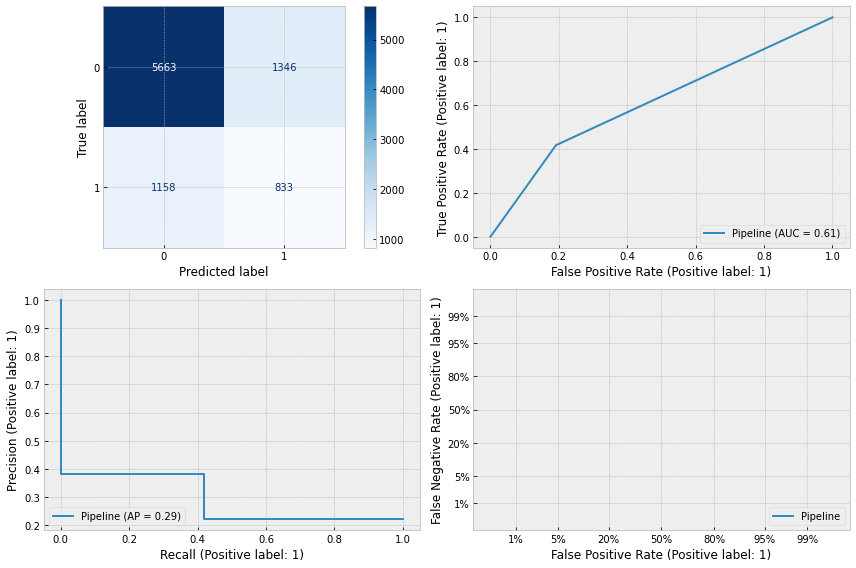

In [6]:
# Decision Tree

tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123))
tree.fit(X_train, y_train)
classifier_evaluation(tree, X_test, y_test)

RANDOMFORESTCLASSIFIER
Accuracy: 81.04%


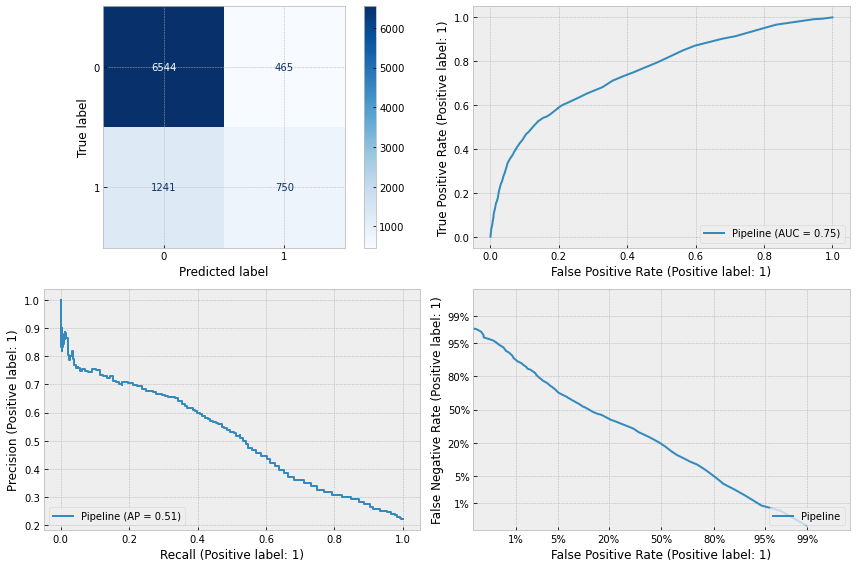

In [7]:
# Random Forest

rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))
rf.fit(X_train, y_train)
classifier_evaluation(rf, X_test, y_test)

GRADIENTBOOSTINGCLASSIFIER
Accuracy: 81.57%


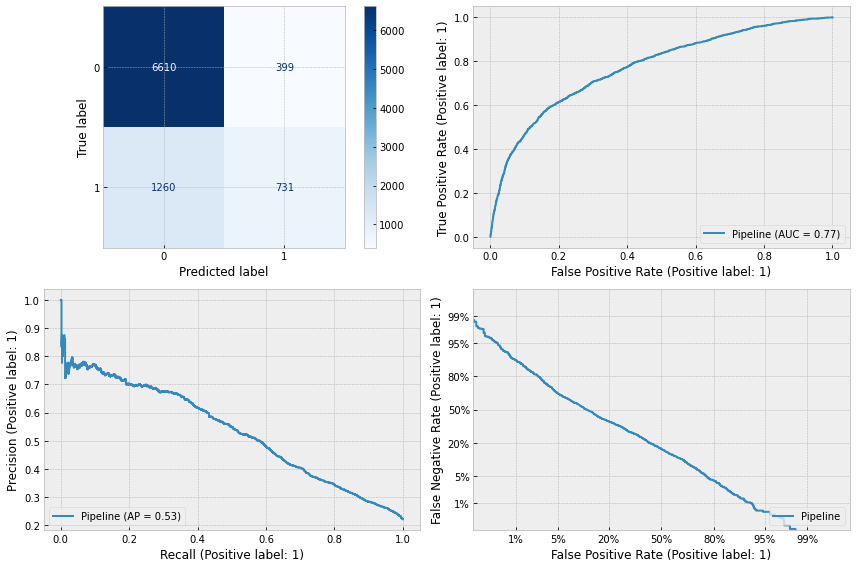

In [8]:
# Gradient Boosted Tree

gbt = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
gbt.fit(X_train, y_train)
classifier_evaluation(gbt, X_test, y_test)

[07:53:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBCLASSIFIER
Accuracy: 80.61%


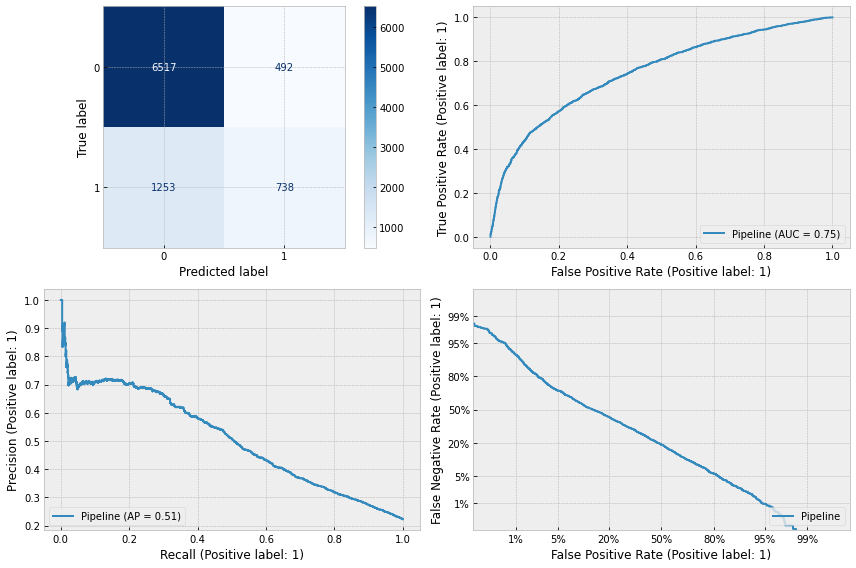

In [9]:
# XGBoost

xgb = make_pipeline(StandardScaler(), XGBClassifier(random_state=123))
xgb.fit(X_train, y_train)
classifier_evaluation(xgb, X_test, y_test)

LGBMCLASSIFIER
Accuracy: 81.49%


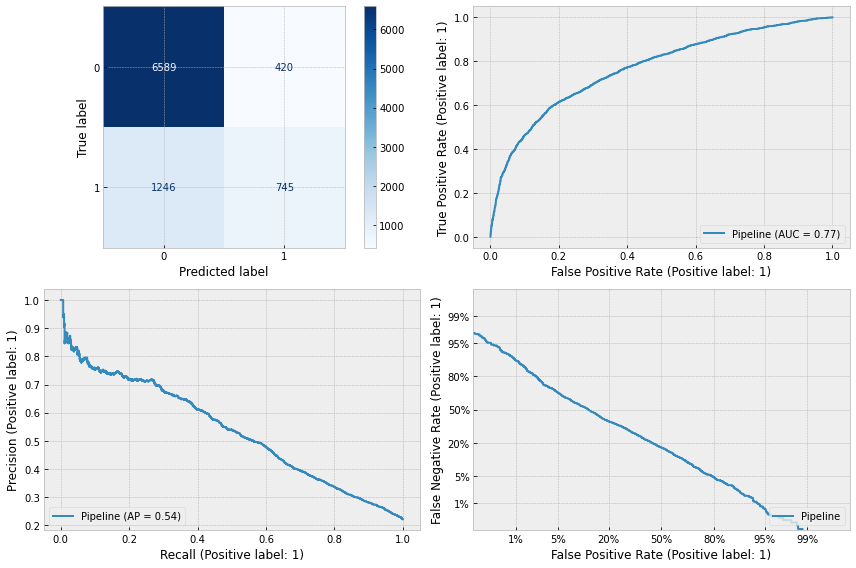

In [10]:
# LightGBM

lgbm = make_pipeline(StandardScaler(), LGBMClassifier(random_state=123))
lgbm.fit(X_train, y_train)
classifier_evaluation(lgbm, X_test, y_test)